### Visualizing the dataset


In [1]:
import os
import pandas as pd
import soundfile as sf
from scipy import signal 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#get the path of the file 
file_name = "Dataset\\birdsong_metadata.csv"
current_dir = os.getcwd() 

file_path = os.path.join(current_dir, file_name) 

In [3]:
df_birdsongs_metadata = pd.read_csv(file_path)
display(df_birdsongs_metadata)

,file_id,genus,species,english_cname,who_provided_recording,country,latitude,longitute,type,license
0,132608,Acanthis,flammea,Common Redpoll,Jarek Matusiak,Poland,50.7932,15.4995,"female, male, song",http://creativecommons.org/licenses/by-nc-sa/3.0/
1,132611,Acanthis,flammea,Common Redpoll,Jarek Matusiak,Poland,50.7932,15.4995,"flight call, male, song",http://creativecommons.org/licenses/by-nc-sa/3.0/
2,35068,Acanthis,flammea,Common Redpoll,Sander Bot,Netherlands,52.8176,6.4326,"call, song",http://creativecommons.org/licenses/by-nc-nd/2.5/
3,82715,Acrocephalus,palustris,Marsh Warbler,Dougie Preston,United Kingdom,60.3539,-1.2689,Song,http://creativecommons.org/licenses/by-nc-nd/2.5/
4,64685,Acrocephalus,palustris,Marsh Warbler,Dougie Preston,United Kingdom,60.3539,-1.2689,Song,http://creativecommons.org/licenses/by-nc-nd/2.5/
...,...,...,...,...,...,...,...,...,...,...
259,132392,Turdus,philomelos,Song Thrush,david m,United Kingdom,54.1200,-0.5445,song,http://creativecommons.org/licenses/by-nc-nd/3.0/
260,146756,Turdus,philomelos,Song Thrush,David Darrell-Lambert,United Kingdom,51.6608,0.0031,song,http://creativecommons.org/licenses/by-nc-sa/3.0/
261,27060,Vanellus,vanellus,Northern Lapwing,Patrik berg,Sweden,58.4051,14.3028,song,http://creativecommons.org/licenses/by-nc-sa/3.0/
262,97982,Vanellus,vanellus,Northern Lapwing,Herman van der Meer,Netherlands,52.1520,4.3470,"call, song",http://creativecommons.org/licenses/by-nc-nd/2.5/


In [4]:
unique_bird_names = set(df_birdsongs_metadata["english_cname"])
print("Birds: ", unique_bird_names)
print("Number of unique birds: ", len(unique_bird_names))

Birds:  {'Great Spotted Woodpecker', 'Tawny Owl', 'European Golden Plover', 'European Goldfinch', 'Yellowhammer', 'Common Redstart', 'European Bee-eater', 'Barn Swallow', 'Marsh Warbler', 'African Pied Wagtail', 'Eurasian Wren', 'Common Moorhen', 'Eurasian Collared Dove', 'Redwing', 'Western Yellow Wagtail', 'Lesser Whitethroat', 'Long-tailed Tit', 'River Warbler', 'Common House Martin', 'Black Woodpecker', 'Grey Partridge', 'Eurasian Tree Sparrow', 'Eurasian Coot', 'Eurasian Nuthatch', 'Northern Lapwing', 'European Honey Buzzard', 'Common Blackbird', 'Common Reed Bunting', 'Goldcrest', 'Meadow Pipit', 'Dunlin', 'European Green Woodpecker', 'Wood Sandpiper', 'European Nightjar', 'Eurasian Wryneck', 'House Sparrow', 'Common Swift', 'European Robin', 'Sedge Warbler', 'Rook', 'Great Tit', 'Tree Pipit', 'Northern Raven', 'Willow Warbler', 'Common Cuckoo', 'Corn Bunting', 'Carrion Crow', 'Eurasian Treecreeper', 'Common Whitethroat', 'Common Redshank', 'Eurasian Blue Tit', 'Spotted Flycatche

In [5]:
# print the number of occurrences of each bird
print(df_birdsongs_metadata['english_cname'].value_counts().to_dict())

{'Common Redpoll': 3, 'Marsh Warbler': 3, 'European Green Woodpecker': 3, 'Eurasian Magpie': 3, 'Willow Warbler': 3, 'Wood Warbler': 3, 'Common Chiffchaff': 3, 'Common Redstart': 3, 'Common Pheasant': 3, 'European Honey Buzzard': 3, 'Coal Tit': 3, 'Grey Partridge': 3, 'Eurasian Tree Sparrow': 3, 'House Sparrow': 3, 'Great Tit': 3, 'Eurasian Golden Oriole': 3, 'Spotted Flycatcher': 3, 'Western Yellow Wagtail': 3, 'African Pied Wagtail': 3, 'European Bee-eater': 3, 'Common Nightingale': 3, 'European Golden Plover': 3, 'Grey Plover': 3, 'Willow Tit': 3, 'Garden Warbler': 3, 'Song Thrush': 3, 'Common Blackbird': 3, 'Redwing': 3, 'Eurasian Wren': 3, 'Common Redshank': 3, 'Wood Sandpiper': 3, 'Lesser Whitethroat': 3, 'Common Whitethroat': 3, 'Eurasian Blackcap': 3, 'Marsh Tit': 3, 'Common Starling': 3, 'Tawny Owl': 3, 'European Turtle Dove': 3, 'Eurasian Collared Dove': 3, 'Eurasian Nuthatch': 3, 'Goldcrest': 3, 'Eurasian Bullfinch': 3, 'Dunnock': 3, 'Red Crossbill': 3, 'River Warbler': 3, '

### Inspecting the Audio files

In [6]:
#get the directory of the bird songs
song_path = os.path.join(current_dir, "Dataset\\songs\\songs") 

In [7]:
#select only the common redpoll data 
df_common_redpoll_data = df_birdsongs_metadata[df_birdsongs_metadata['english_cname'] == "Common Redpoll"]
# df_common_redpoll_data = df_birdsongs_metadata[df_birdsongs_metadata['english_cname'] == "European Goldfinch"]

#select the file_ids 
display(df_common_redpoll_data)

,file_id,genus,species,english_cname,who_provided_recording,country,latitude,longitute,type,license
0,132608,Acanthis,flammea,Common Redpoll,Jarek Matusiak,Poland,50.7932,15.4995,"female, male, song",http://creativecommons.org/licenses/by-nc-sa/3.0/
1,132611,Acanthis,flammea,Common Redpoll,Jarek Matusiak,Poland,50.7932,15.4995,"flight call, male, song",http://creativecommons.org/licenses/by-nc-sa/3.0/
2,35068,Acanthis,flammea,Common Redpoll,Sander Bot,Netherlands,52.8176,6.4326,"call, song",http://creativecommons.org/licenses/by-nc-nd/2.5/


In [8]:
#selecting one of the 3 files
sound_file = "xc132608.flac"
# sound_file = "xc132611.flac"
# sound_file = "xc35068.flac"

sound_file = "xc97792.flac" #European Goldfinch

sound_file_path = os.path.join(song_path, sound_file)
print(os.path.isfile(sound_file_path))

True


In [9]:
#load the audio file as a numpy array
audio_data, sample_rate = sf.read(sound_file_path) 
print("Sample rate: ", sample_rate)
duration_in_seconds = round(len(audio_data) / sample_rate, 2)
print(f"Audio duration: {duration_in_seconds} seconds")

Sample rate:  44100
Audio duration: 38.27 seconds


### Plot the audio signal and its spectogram

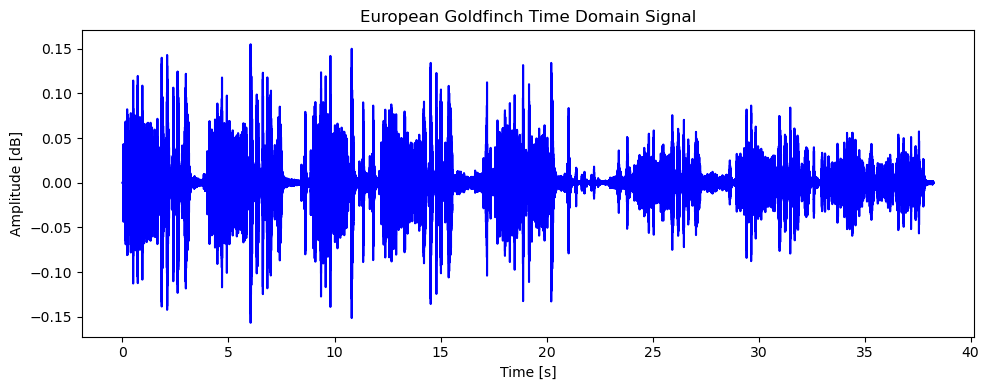

C:\Users\bensa\AppData\Local\Temp\ipykernel_32288\633743193.py:21: RuntimeWarning: divide by zero encountered in log10
  pcm = plt.pcolormesh(times, frequencies, 10 * np.log10(spectrogram), shading='auto')


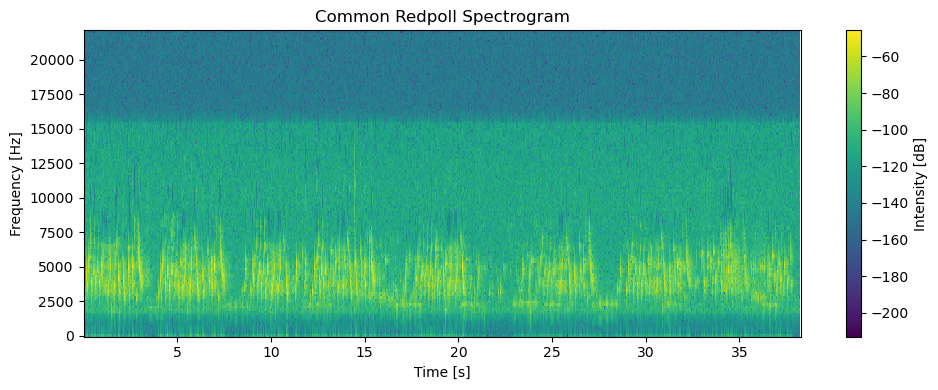

In [12]:
# Create a time axis for the audio signal
time_audio = np.arange(0, len(audio_data)) / sample_rate

# Create a spectrogram
frequencies, times, spectrogram = signal.spectrogram(audio_data, fs=sample_rate)

# Plot the audio signal
plt.figure(figsize=(10, 4))
plt.plot(time_audio, audio_data, color='blue')
# plt.title('Common Redpoll Time Domain Signal')
plt.title('European Goldfinch Time Domain Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude [dB]')
plt.tight_layout()
# plt.savefig('common_redpool_audio_signal_plot.png')
plt.savefig('european_goldfinch_audio_signal_plot.png')
plt.show()

# Plot the spectrogram
plt.figure(figsize=(10, 4))
pcm = plt.pcolormesh(times, frequencies, 10 * np.log10(spectrogram), shading='auto')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [s]')
plt.title('Common Redpoll Spectrogram')
# plt.title("European Goldfinch Spectrogram")
cbar = plt.colorbar(pcm, label='Intensity [dB]')
plt.tight_layout()
# plt.savefig('common_redpool_spectrogram_plot.png')
# plt.savefig('european_goldfinch_spectrogram_plot.png')
plt.show()